# Car price prediction(assignment-2) by Edulakanti Richa Reddy

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('car_price_data2.csv')


In [3]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [4]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df['Car_age']=2021-df['Year']

In [6]:
df.drop(labels='Year',axis=1,inplace=True)

In [7]:
df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


# Explorartory Data Analysis

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
 8   Car_age        301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
df.describe()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_age
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,4.661296,7.628472,36947.205980,0.043189,7.372093
std,5.082812,8.644115,38886.883882,0.247915,2.891554
min,0.100000,0.320000,500.000000,0.000000,3.000000
25%,0.900000,1.200000,15000.000000,0.000000,5.000000
50%,3.600000,6.400000,32000.000000,0.000000,7.000000
75%,6.000000,9.900000,48767.000000,0.000000,9.000000
max,35.000000,92.600000,500000.000000,3.000000,18.000000


In [10]:
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Car_age,0,0.0
Owner,0,0.0
Transmission,0,0.0
Seller_Type,0,0.0
Fuel_Type,0,0.0


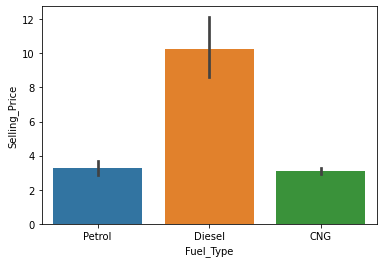

In [11]:
sns.barplot(x='Fuel_Type', y='Selling_Price', data=df)

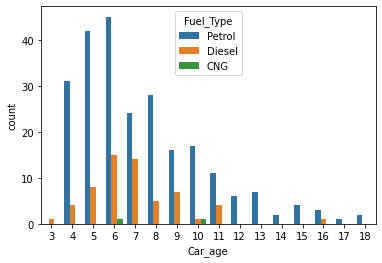

In [12]:
sns.countplot(x='Car_age',hue='Fuel_Type',data=df)

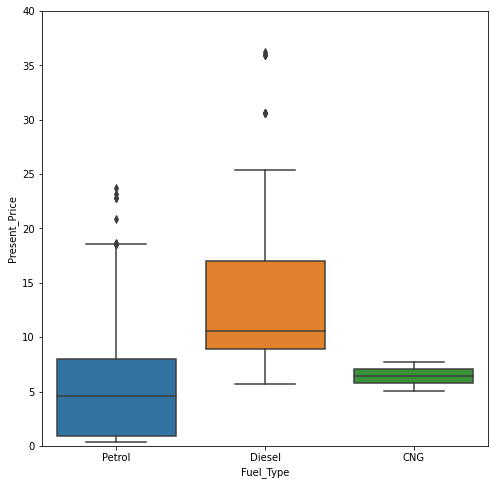

In [13]:
var = 'Fuel_Type'
data = pd.concat([df['Present_Price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 8))
fig = sns.boxplot(x=var, y="Present_Price", data=data)
fig.axis(ymin=0, ymax=40);

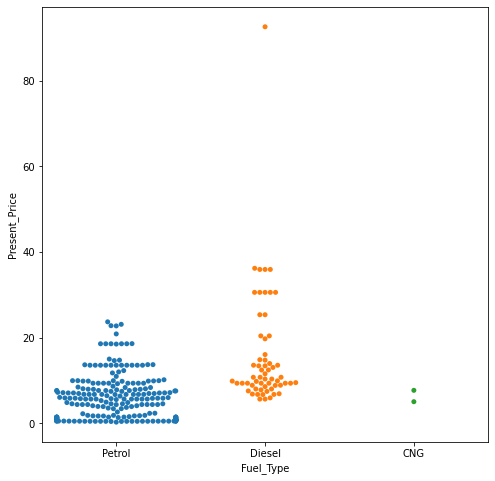

In [14]:
var = 'Fuel_Type'
fig, ax = plt.subplots()
fig.set_size_inches(8, 8)
sns.swarmplot(x = var, y ='Present_Price', data =df)

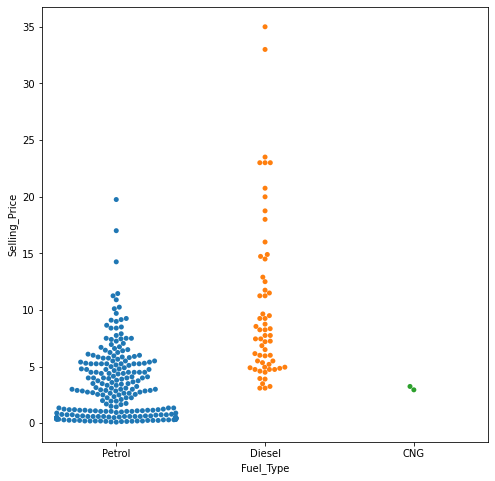

In [15]:
var = 'Fuel_Type'
fig, ax = plt.subplots()
fig.set_size_inches(8, 8)
sns.swarmplot(x = var, y ='Selling_Price', data =df)

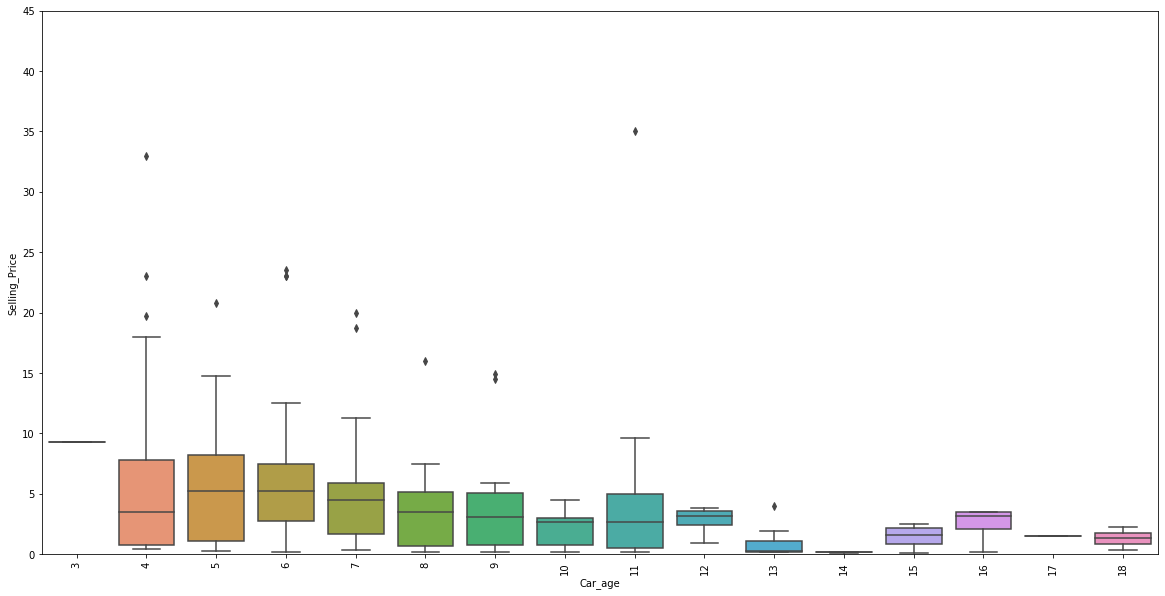

In [16]:
var = 'Car_age'
data = pd.concat([df['Selling_Price'],df[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x=var, y="Selling_Price", data=data)
fig.axis(ymin=0, ymax=45);
plt.xticks(rotation=90);

# Data Preprocessing

In [17]:
df['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [18]:
df['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [19]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [20]:
df['Car_Name'].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [21]:
df.drop('Car_Name',axis=1,inplace=True)

In [22]:
data=pd.get_dummies(df,drop_first=True)
data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


Checking Multicollinearity using VIF

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=data[['Present_Price','Kms_Driven','Owner','Car_age','Fuel_Type_Diesel','Fuel_Type_Petrol','Seller_Type_Individual','Transmission_Manual']]
vif=pd.DataFrame()
vif["VIF"]=[variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif["Features"]=variables.columns
vif

,VIF,Features
0,3.204463,Present_Price
1,2.892740,Kms_Driven
2,1.087681,Owner
3,10.831000,Car_age
4,4.891105,Fuel_Type_Diesel
5,14.342446,Fuel_Type_Petrol
6,2.230725,Seller_Type_Individual
7,8.392371,Transmission_Manual


In [24]:
data_no_multicollinearity=data.drop('Fuel_Type_Petrol',axis=1)

In [25]:
variables=data[['Present_Price','Kms_Driven','Owner','Car_age','Fuel_Type_Diesel','Seller_Type_Individual','Transmission_Manual']]
vif=pd.DataFrame()
vif["VIF"]=[variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif["Features"]=variables.columns
vif

,VIF,Features
0,2.544336,Present_Price
1,2.886452,Kms_Driven
2,1.082447,Owner
3,8.713539,Car_age
4,1.706132,Fuel_Type_Diesel
5,1.904835,Seller_Type_Individual
6,4.666095,Transmission_Manual


In [26]:
data_no_multicollinearity=data.drop('Car_age',axis=1)

In [27]:
variables=data[['Present_Price','Kms_Driven','Owner','Fuel_Type_Diesel','Seller_Type_Individual','Transmission_Manual']]
vif=pd.DataFrame()
vif["VIF"]=[variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif["Features"]=variables.columns
vif

,VIF,Features
0,2.200428,Present_Price
1,1.883557,Kms_Driven
2,1.065887,Owner
3,1.669188,Fuel_Type_Diesel
4,1.748669,Seller_Type_Individual
5,2.465705,Transmission_Manual


In [28]:
data_no_multicollinearity.drop(labels='Fuel_Type_Petrol',axis=1)

,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,0,0,1
1,4.75,9.54,43000,0,1,0,1
2,7.25,9.85,6900,0,0,0,1
3,2.85,4.15,5200,0,0,0,1
4,4.60,6.87,42450,0,1,0,1
...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,1,0,1
297,4.00,5.90,60000,0,0,0,1
298,3.35,11.00,87934,0,0,0,1
299,11.50,12.50,9000,0,1,0,1


In [29]:
x=data_no_multicollinearity.drop('Selling_Price',axis=1)

In [30]:
y=data_no_multicollinearity['Selling_Price']

Feature Scaling

In [31]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x[['Present_Price','Kms_Driven']])

StandardScaler()

Training and Testing

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# Ml model

# Linear_Regression

In [33]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
y_pred

array([ 6.88964206,  0.96164601,  3.88984693,  8.36915728, 14.02105143,
        4.39441057,  4.13182723,  0.94941662,  6.05140004,  5.19658685,
        3.47598139,  1.1263384 ,  3.98364301,  7.71311028,  7.84649064,
       13.29880406,  7.11197167,  4.01657233,  0.56173689,  1.47029759,
        6.18974754,  2.776493  ,  7.05249176,  7.22235454, -0.1797864 ,
        0.98802991, -0.47264098,  0.75781258,  0.8861119 ,  8.70752758,
        4.32302694,  7.37294654,  0.63949642,  7.52199065,  4.7588688 ,
        1.18695626,  4.90138059,  6.68329541, -1.02977555,  8.77280008,
        8.28768365, 20.23172023,  4.30469526,  2.70694603,  6.66802818,
        9.16239515,  0.36592768,  1.10496168,  5.03205302,  7.13496559,
        8.58800249,  3.61101905,  4.70045817, 20.10841249,  0.99582927,
        0.81892049,  0.73988511,  2.69648666,  3.33467925,  0.29032312,
        6.18858764])

In [34]:
y_test

223     8.25
150     0.50
226     5.25
296     9.50
52     18.00
       ...  
137     0.65
227     2.55
26      4.15
106     1.35
92      3.51
Name: Selling_Price, Length: 61, dtype: float64

In [35]:
from sklearn.metrics import mean_squared_error,r2_score

In [36]:
r_squared=r2_score(y_test,y_pred)

In [37]:

r_squared


0.8795077661641193

In [38]:
mse=mean_squared_error(y_test,y_pred)


In [53]:
s1=mse
s1

2.0456451692087882

# Decision Trees

In [40]:
from sklearn.tree import DecisionTreeRegressor,plot_tree
dr=DecisionTreeRegressor(random_state=0)
dr.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

In [41]:
y_pred1=dr.predict(x_test)
y_pred1


array([ 4.95 ,  0.4  ,  4.4  ,  7.25 , 14.25 ,  5.3  ,  2.9  ,  0.25 ,
        5.15 ,  5.225,  2.   ,  0.9  ,  4.85 ,  6.7  ,  7.75 , 14.25 ,
        6.4  ,  3.45 ,  0.45 ,  1.65 ,  2.1  ,  4.9  ,  5.225,  9.7  ,
        0.2  ,  0.4  ,  0.2  ,  0.45 ,  0.45 ,  3.8  ,  3.9  ,  5.95 ,
        0.45 ,  6.5  ,  4.1  ,  1.05 ,  6.25 ,  2.65 ,  0.2  , 11.25 ,
        7.25 , 23.   ,  4.9  ,  4.4  ,  5.5  ,  8.4  ,  0.5  ,  0.4  ,
        5.   ,  7.75 ,  8.99 ,  3.1  ,  5.   , 23.   ,  1.25 ,  1.1  ,
        0.55 ,  2.9  ,  4.   ,  3.   ,  5.5  ])

In [42]:
y_test

223     8.25
150     0.50
226     5.25
296     9.50
52     18.00
       ...  
137     0.65
227     2.55
26      4.15
106     1.35
92      3.51
Name: Selling_Price, Length: 61, dtype: float64

In [43]:
r_squared=r2_score(y_test,y_pred1)
r_squared


0.9079354451502754

In [54]:
mse=mean_squared_error(y_test,y_pred1)
s2=mse
s2

2.3271450819672133

[Text(486.0531496062992, 365.88461538461536, 'X[0] <= 7.775\nmse = 18.779\nsamples = 61\nvalue = 4.944'),
 Text(265.2696850393701, 336.6138461538461, 'X[0] <= 3.94\nmse = 3.157\nsamples = 34\nvalue = 2.081'),
 Text(187.8307086614173, 307.3430769230769, 'X[1] <= 25500.0\nmse = 0.363\nsamples = 19\nvalue = 0.64'),
 Text(125.22047244094487, 278.0723076923077, 'X[1] <= 10850.0\nmse = 0.077\nsamples = 13\nvalue = 0.931'),
 Text(79.08661417322834, 248.80153846153846, 'X[0] <= 1.66\nmse = 0.028\nsamples = 7\nvalue = 1.113'),
 Text(65.90551181102362, 219.5307692307692, 'X[0] <= 0.895\nmse = 0.008\nsamples = 6\nvalue = 1.053'),
 Text(39.54330708661417, 190.26, 'X[0] <= 0.833\nmse = 0.0\nsamples = 3\nvalue = 0.966'),
 Text(26.362204724409448, 160.98923076923077, 'X[0] <= 0.688\nmse = 0.0\nsamples = 2\nvalue = 0.956'),
 Text(13.181102362204724, 131.71846153846153, 'mse = 0.0\nsamples = 1\nvalue = 0.949'),
 Text(39.54330708661417, 131.71846153846153, 'mse = 0.0\nsamples = 1\nvalue = 0.962'),
 Text

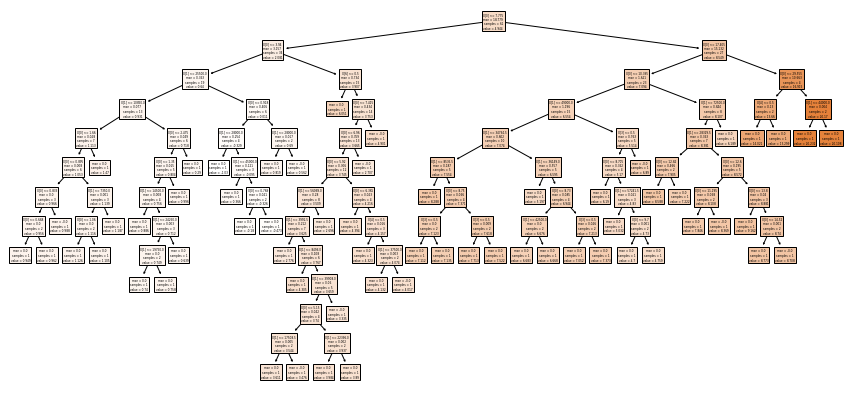

In [45]:
df=dr.fit(x_test,y_pred)
plt.figure(figsize=(15,7))
plot_tree(df,filled=True)

# Random_Forest_Regressor

In [46]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)


In [47]:
y_pred

array([ 5.112     ,  0.517     ,  4.4015    ,  7.72133333, 14.2937    ,
        4.7635    ,  3.5875    ,  0.39715   ,  4.4735    ,  5.41455   ,
        2.8485    ,  0.8385    ,  4.5485    ,  7.926     ,  7.331     ,
       13.6827    ,  7.054     ,  3.71      ,  0.5122    ,  1.6165    ,
        3.761     ,  4.643     ,  5.843925  ,  9.7214    ,  0.1968    ,
        0.5572    ,  0.2709    ,  0.6346    ,  0.5166    ,  6.0635    ,
        3.551     ,  5.6725    ,  0.4868    ,  7.077     ,  4.546     ,
        1.107     ,  5.961     ,  4.55      ,  0.28      ,  9.05      ,
        7.6372    , 24.52      ,  4.679     ,  4.2895    ,  5.7765    ,
       10.8565    ,  0.3379    ,  0.637     ,  5.064     ,  6.4355    ,
        9.3203    ,  3.0435    ,  4.8745    , 24.62      ,  1.1469    ,
        1.1217    ,  0.5601    ,  2.7395    ,  3.4595    ,  2.5655    ,
        5.3565    ])

In [48]:
r_squared=r2_score(y_test,y_pred)

In [49]:
r_squared


0.9190719077452215

In [55]:
mse=mean_squared_error(y_test,y_pred)
s3=mse
s3

2.0456451692087882

# Comparision Table based on mse


In [57]:
results = pd.DataFrame({
    'Score': [s1,s2,s3],
    'Model': ['Linear Regression','Decision Tree','Random Forest']
    })
result_df = results.sort_values(by='Score', ascending=True)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
2.045645,Linear Regression
2.045645,Random Forest
2.327145,Decision Tree
